<a href="https://colab.research.google.com/github/Dhaarani13/Project/blob/main/traditional_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import os
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
from tqdm import tqdm  # Progress bar for large datasets
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
# Download latest version
path = kagglehub.dataset_download("grassknoted/asl-alphabet")

print("Path to dataset files:", path)

100%|██████████| 1.03G/1.03G [00:09<00:00, 117MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1


In [3]:
0# Listing the directories in the path in a list

dataset_path = "/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1"
print("Dataset files:", os.listdir(dataset_path))

Dataset files: ['asl_alphabet_train', 'asl_alphabet_test']


In [4]:
# Listing the classes in asl_alphabet_train

train_path = os.path.join(dataset_path, "asl_alphabet_train" , "asl_alphabet_train")
classes = os.listdir(train_path)

print("Classes in dataset:", classes)
print("Total classes:", len(classes))

Classes in dataset: ['L', 'K', 'M', 'nothing', 'S', 'C', 'Q', 'H', 'F', 'V', 'space', 'Z', 'X', 'B', 'A', 'N', 'I', 'W', 'Y', 'T', 'O', 'R', 'E', 'G', 'D', 'P', 'del', 'J', 'U']
Total classes: 29


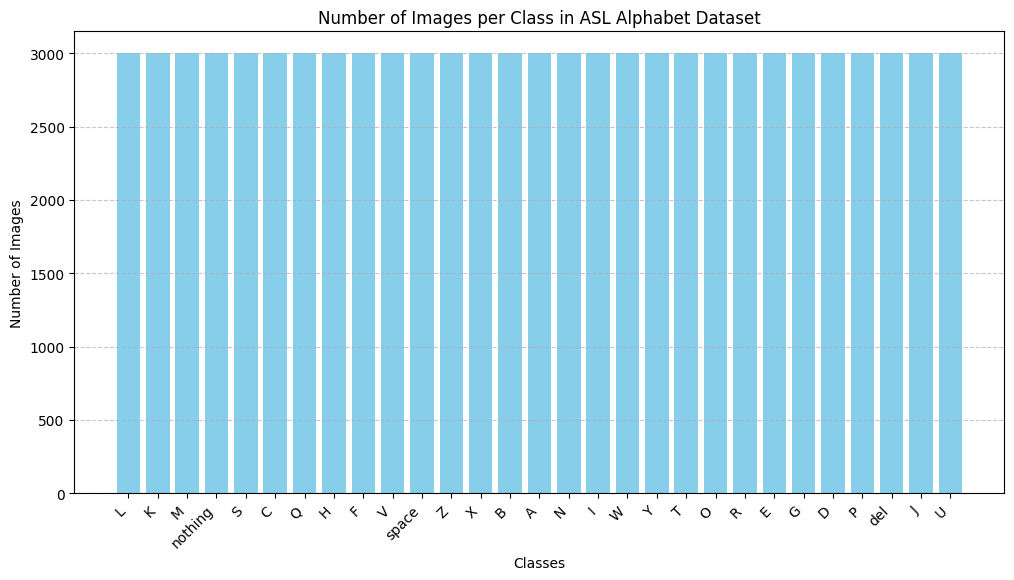

In [5]:
import os
import matplotlib.pyplot as plt

# Path to training dataset
train_path = os.path.join(dataset_path, "asl_alphabet_train", "asl_alphabet_train")

# Get class names
classes = os.listdir(train_path)

# Count images in each class
class_counts = {cls: len(os.listdir(os.path.join(train_path, cls))) for cls in classes}

# Sort by count (optional)
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class in ASL Alphabet Dataset")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [6]:
# Listing the classes in asl_alphabet_test

train_path = os.path.join(dataset_path, "asl_alphabet_test" , "asl_alphabet_test")
clas = os.listdir(train_path)

print("Classes in dataset:", clas)
print("Total classes:", len(clas))

Classes in dataset: ['B_test.jpg', 'P_test.jpg', 'N_test.jpg', 'Q_test.jpg', 'V_test.jpg', 'U_test.jpg', 'S_test.jpg', 'nothing_test.jpg', 'I_test.jpg', 'L_test.jpg', 'F_test.jpg', 'G_test.jpg', 'M_test.jpg', 'W_test.jpg', 'J_test.jpg', 'E_test.jpg', 'space_test.jpg', 'R_test.jpg', 'K_test.jpg', 'D_test.jpg', 'T_test.jpg', 'C_test.jpg', 'Z_test.jpg', 'A_test.jpg', 'O_test.jpg', 'H_test.jpg', 'X_test.jpg', 'Y_test.jpg']
Total classes: 28


/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/L/L1426.jpg
/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/R/R1587.jpg
/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/T/T841.jpg
/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/M/M603.jpg
/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/J/J1539.jpg


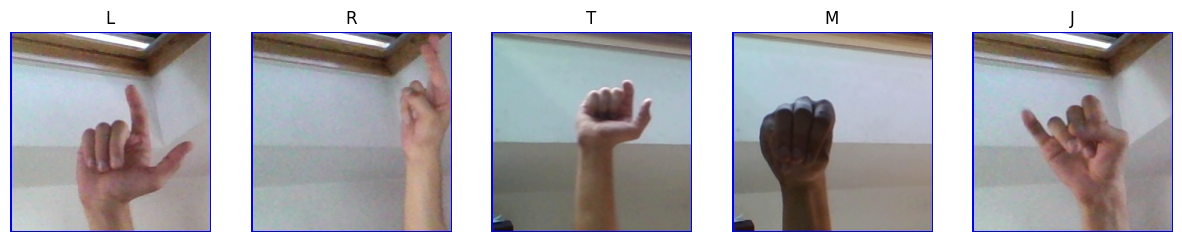

In [7]:
#function to show random sample images in the dataset and its classes
def show_sample_images(train_path, num_images=5):

    classes = os.listdir(train_path)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        class_name = random.choice(classes)
        class_path = os.path.join(train_path, class_name)
        image_name = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path, image_name)
        print(image_path)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis("off")

    plt.show()

# Full path to the data set
dataset_path = "/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train"
#Calling the function
show_sample_images(dataset_path)

In [8]:

# Define paths
input_dir = "/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/"
output_dir = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"

# Create output directory if it does not exist
os.makedirs(output_dir, exist_ok=True)

# Set target image size
IMG_SIZE = (100, 100)

# Function to preprocess images
def preprocess_images(input_dir, output_dir):
    for category in tqdm(os.listdir(input_dir)):  # Loop through A-Z, 0-9, etc.
        category_path = os.path.join(input_dir, category)
        output_category_path = os.path.join(output_dir, category)

        if not os.path.isdir(category_path):
            continue  # Skip if it's not a directory

        os.makedirs(output_category_path, exist_ok=True)  # Create category folder in output

        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)  # Load image

            if img is None:
                continue  # Skip unreadable images

            img = cv2.resize(img, IMG_SIZE)  # Resize to 50x50
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

            # Apply binary thresholding (adaptive for better hand detection)
            _, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

            # Normalize pixel values (convert to float between 0 and 1)
            img_normalized = img_thresh / 255.0

            # Save preprocessed image
            save_path = os.path.join(output_category_path, img_name)
            cv2.imwrite(save_path, (img_normalized * 255).astype(np.uint8))  # Convert back to uint8

# Run preprocessing
preprocess_images(input_dir, output_dir)

print("Preprocessing completed. Saved in:", output_dir)



100%|██████████| 29/29 [01:05<00:00,  2.27s/it]

Preprocessing completed. Saved in: /root/.cache/kagglehub/datasets/processed_asl_alphabet/


In [9]:
preprocessed = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"
print("Dataset files:", os.listdir(preprocessed))

Dataset files: ['L', 'K', 'M', 'nothing', 'S', 'C', 'Q', 'H', 'F', 'V', 'space', 'Z', 'X', 'B', 'A', 'N', 'I', 'W', 'Y', 'T', 'O', 'R', 'E', 'G', 'D', 'P', 'del', 'J', 'U']


/root/.cache/kagglehub/datasets/processed_asl_alphabet/nothing/nothing436.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/W/W7.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/Y/Y1942.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/S/S1149.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/G/G2345.jpg


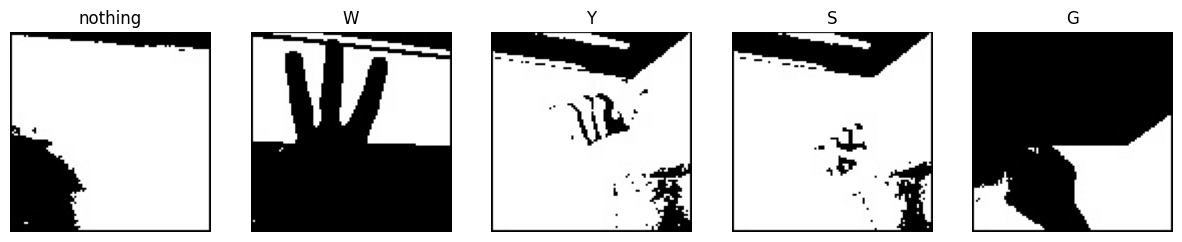

In [10]:
#function to show random sample images in the dataset and its classes
def show_sample_images(train_path, num_images=5):

    classes = os.listdir(train_path)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        class_name = random.choice(classes)
        class_path = os.path.join(train_path, class_name)
        image_name = random.choice(os.listdir(class_path))
        image_path = os.path.join(class_path, image_name)
        print(image_path)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis("off")

    plt.show()

# Full path to the data set
dataset_path = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"
#Calling the function
show_sample_images(dataset_path)

In [13]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define dataset path
dataset_path = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"
IMG_SIZE = 50  # Image size (50x50)
NUM_CLASSES = 29  # ASL Alphabet (26 letters + space, delete, nothing)

# Load dataset
X, y = [], []
label_map = {label: idx for idx, label in enumerate(sorted(os.listdir(dataset_path)))}

for label in os.listdir(dataset_path):
    label_dir = os.path.join(dataset_path, label)
    if os.path.isdir(label_dir):  # Ensure it's a directory
        for img_name in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_name)
            img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE), color_mode="grayscale")
            img_array = img_to_array(img) / 255.0  # Normalize pixels to [0,1]
            X.append(img_array)
            y.append(label_map[label])  # Assign numeric label

# Convert to numpy arrays
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # Reshape to (samples, 50, 50, 1)
y = np.array(y)

# One-hot encode labels
y = to_categorical(y, NUM_CLASSES)

# Split into train and test sets (70-30 for lower accuracy)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Dataset loaded! X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

# Define CNN model with **2 extra layers**
def build_model():
    model = Sequential([
        Conv2D(16, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),  # Layer 1
        MaxPooling2D((2,2)),
        Dropout(0.3),

        Conv2D(32, (3,3), activation='relu'),  # Layer 2
        MaxPooling2D((2,2)),
        Dropout(0.4),

        Flatten(),
        Dense(128, activation='relu'),  # Increased Dense neurons
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),  # Higher LR
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create and train model
model = build_model()
model.summary()  # Display model architecture

# Train the model
EPOCHS = 15  # Reduced epochs (from 8 to 5)
BATCH_SIZE = 32  # Increased batch size (was 16)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE)

# Save the trained model
model.save("sign_language_cnn_2extra_layers.h5")

print("Model training complete and saved as 'sign_language_cnn_2extra_layers.h5' 🎉")


Dataset loaded! X_train shape: (60900, 50, 50, 1), y_train shape: (60900, 29)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 24, 24, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 22, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3872)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         495,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 29)                  │           3,741 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 504,285 (1.92 MB)

 Trainable params: 504,285 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 117s 60ms/step - accuracy: 0.2618 - loss: 2.4666 - val_accuracy: 0.7825 - val_loss: 0.7769
Epoch 2/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 133s 56ms/step - accuracy: 0.5877 - loss: 1.2165 - val_accuracy: 0.8383 - val_loss: 0.5663
Epoch 3/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 140s 55ms/step - accuracy: 0.6447 - loss: 1.0490 - val_accuracy: 0.8590 - val_loss: 0.4902
Epoch 4/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 104s 55ms/step - accuracy: 0.6706 - loss: 0.9725 - val_accuracy: 0.8793 - val_loss: 0.4026
Epoch 5/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 152s 60ms/step - accuracy: 0.6847 - loss: 0.9220 - val_accuracy: 0.8874 - val_loss: 0.3980
Epoch 6/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 133s 55ms/step - accuracy: 0.6927 - loss: 0.9051 - val_accuracy: 0.8837 - val_loss: 0.3860
Epoch 7/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 152s 60ms/step - accuracy: 0.7035 - loss: 0.8817 - val_accuracy: 0.9027 - val_loss: 0.3313
Epoch 8/15
1904/1904 ━━━━━━━━━━━━━━━━━━━━ 132s 55ms/step - accuracy: 

Model training complete and saved as 'sign_language_cnn_2extra_layers.h5' 🎉


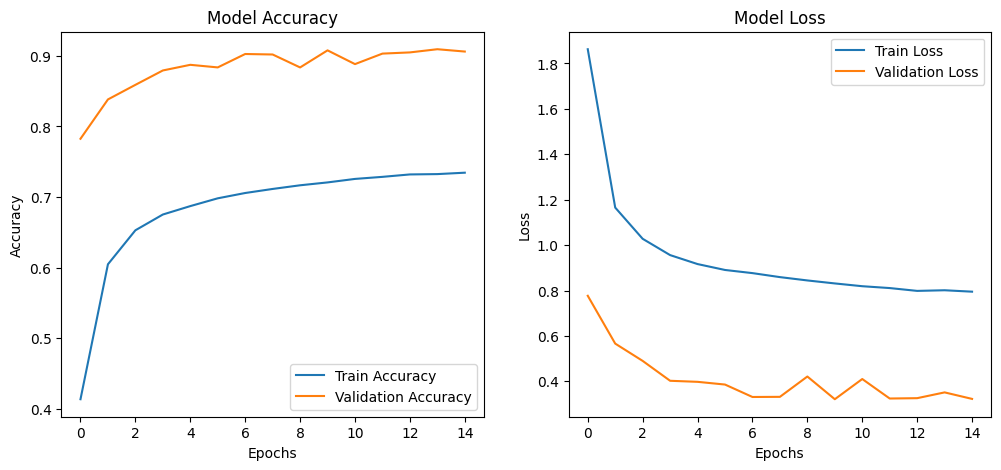

In [14]:
import matplotlib.pyplot as plt

# Train the model and store history
#history = model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()
